In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
datasets = pd.read_csv('C:/Users/mLc/Downloads/parkinsons.data')

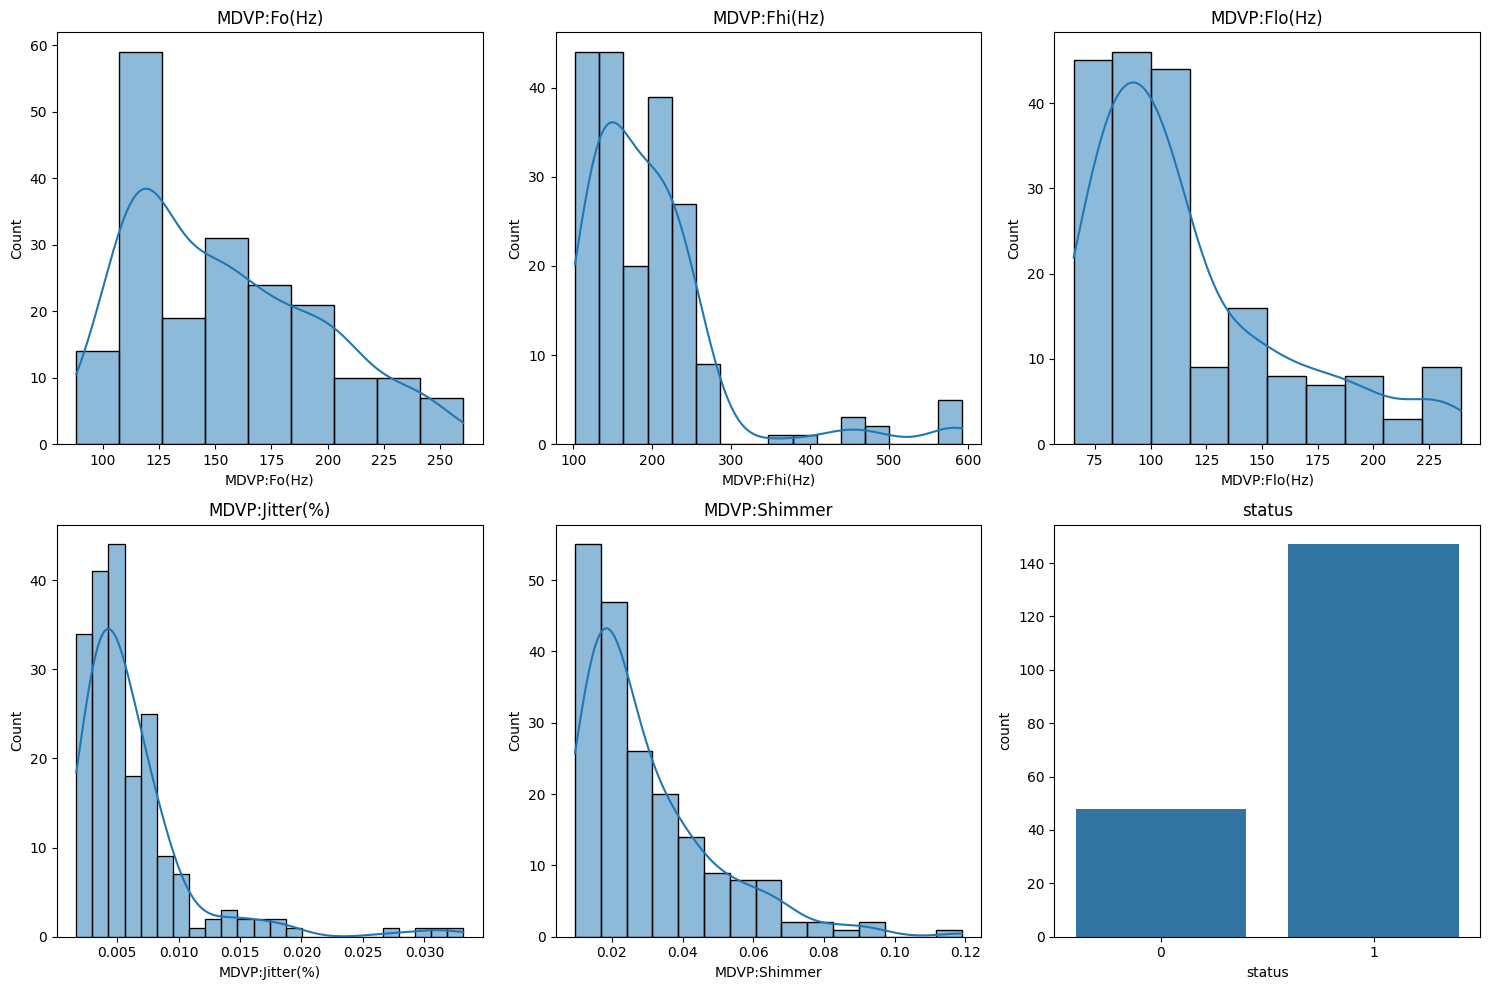

In [90]:
#datasets.head()
#datasets.describe()
#datasets.isnull().sum()
#datasets.status.value_counts()
columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Shimmer', 'status']

num_rows, num_cols = 2, 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))  

for i, column in enumerate(columns, 1):
    row, col = divmod(i - 1, num_cols)
    ax = axes[row, col]
    if column == 'status':
        sns.countplot(data=datasets, x=column, ax=ax)
    else:
      sns.histplot(datasets[column], kde=True, ax=ax)
    
    ax.set_title(column)

plt.tight_layout();
plt.show()



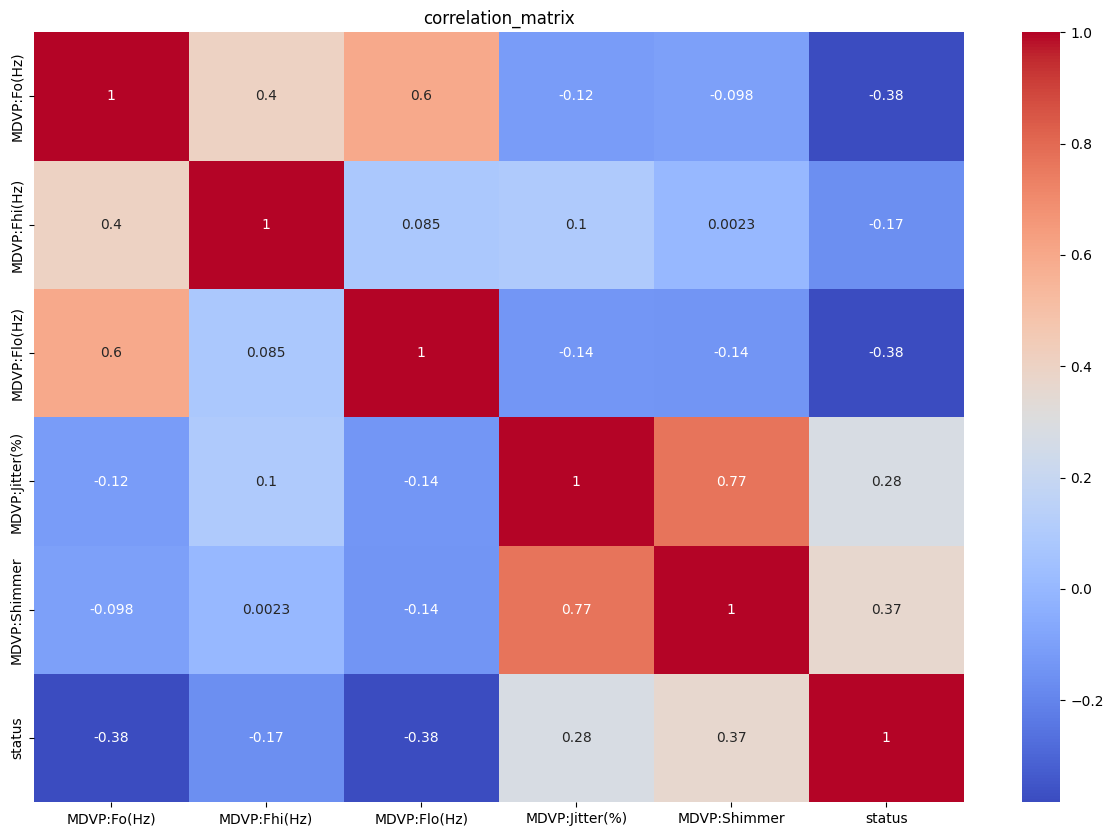

In [91]:
plt.figure(figsize=(15,10))
correlation_matrix = datasets[columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("correlation_matrix")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


Random Forest Classifier

In [92]:
x = datasets.drop(['name', 'status'], axis=1)
y = datasets['status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)
prediction = model.predict(x_test)
accuracy_scores = accuracy_score(y_test, prediction)
classification_reports = classification_report(y_test, prediction)
print(f"model prediction is : {prediction}")
print("accuracy_score is ", accuracy_scores)
print("classification_report is : " , classification_reports)

model prediction is : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1
 1 1]
accuracy_score is  0.9487179487179487
classification_report is :                precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

x_data = StandardScaler().fit_transform(x)

pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(x_data)

print(f"Total number of components retained: {pca.n_components_}")
print(f"exlained varience is : {np.sum(pca.explained_variance_ratio_)}")


Total number of components retained: 8
exlained varience is : 0.9576670093638884


In [ ]:
from scipy import stats
z_score = np.abs(stats.zscore(x_data))
outliers = np.where(z_score > 3)

print(f"Total number of outliers is : {len(outliers[0])}")

Logistic Regression

Confusion Matrix:
[[ 3  4]
 [ 0 32]]


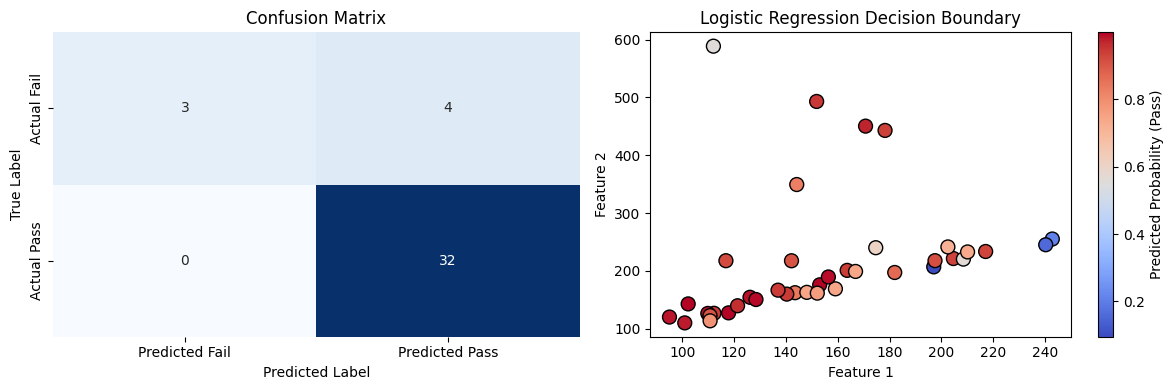

Logistic Model Accuracy:  0.8974358974358975


In [93]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(x_train, y_train)

logistic_model_predict = logistic_model.predict(x_test)
logistic_model_predict_probability = logistic_model.predict_proba(x_test)[:, 1]

accuracy_score_logistic_model = accuracy_score(y_test, logistic_model_predict)
conf_matrix = confusion_matrix(y_test, logistic_model_predict)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,
xticklabels=['Predicted Fail', 'Predicted Pass'],
yticklabels=['Actual Fail', 'Actual Pass'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Plot Logistic Regression Decision Boundary
plt.subplot(1, 2, 2)
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=logistic_model_predict_probability, cmap='coolwarm', edgecolors='k', marker='o', s=100)
plt.colorbar(label='Predicted Probability (Pass)')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Print Accuracy
print("Logistic Model Accuracy: ", accuracy_score_logistic_model)


Support Vector Machine

Confusion Matrix:
[[ 3  4]
 [ 1 31]]


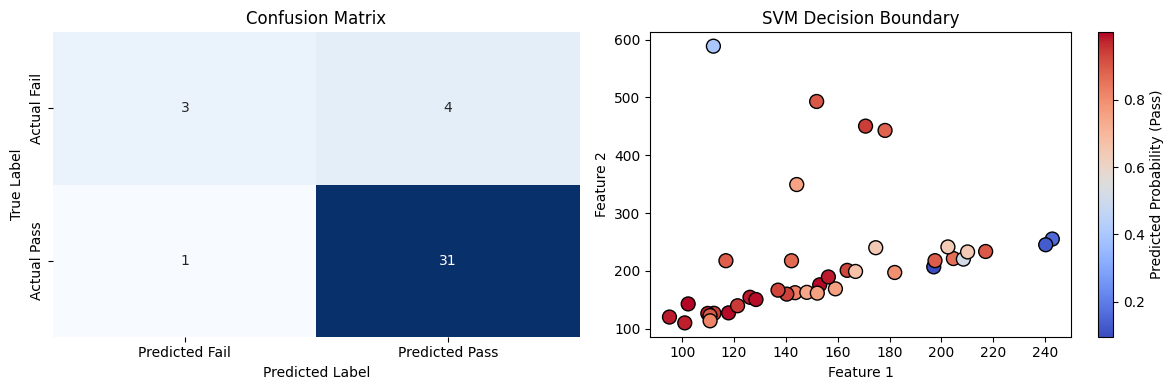

SVM Model Accuracy:  0.8717948717948718


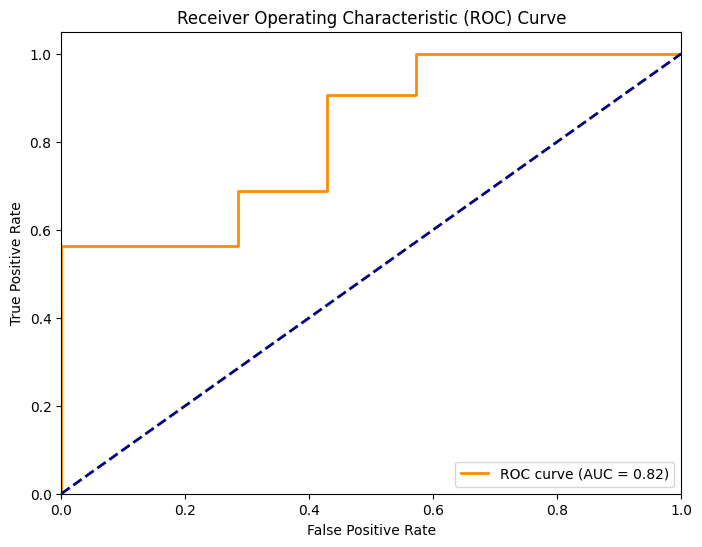

AUC Score: 0.82


In [85]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(x_train, y_train)

svm_model_predict = svm_model.predict(x_test)
svm_model_predict_proba = svm_model.predict_proba(x_test)[:, 1]

accuracy_score_svm_model = accuracy_score(y_test, svm_model_predict)
conf_matrix_svm = confusion_matrix(y_test, svm_model_predict)
print("Confusion Matrix:")
print(conf_matrix_svm)

# Plot Confusion Matrix
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='g', cbar=False,
xticklabels=['Predicted Fail', 'Predicted Pass'],
yticklabels=['Actual Fail', 'Actual Pass'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Plot SVM Decision Boundary
plt.subplot(1, 2, 2)
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=svm_model_predict_proba, cmap='coolwarm', edgecolors='k', marker='o', s=100)
plt.colorbar(label='Predicted Probability (Pass)')
plt.title('SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Print Accuracy
print("SVM Model Accuracy: ", accuracy_score_svm_model)

# Draw ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, svm_model_predict_proba)
roc_auc = roc_auc_score(y_test, svm_model_predict_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score: {:.2f}".format(roc_auc))


Decision Tree Classifier

Confusion Matrix:
[[ 5  2]
 [ 1 31]]


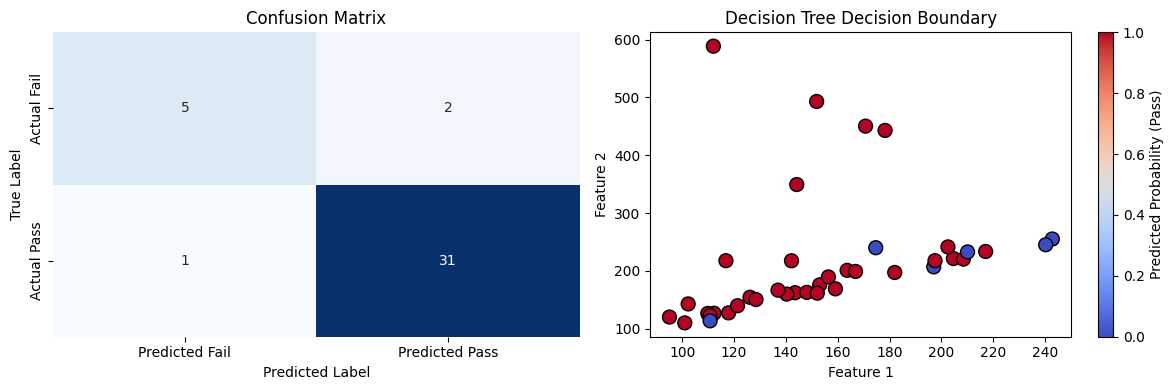

Decision Tree Model Accuracy:  0.9230769230769231


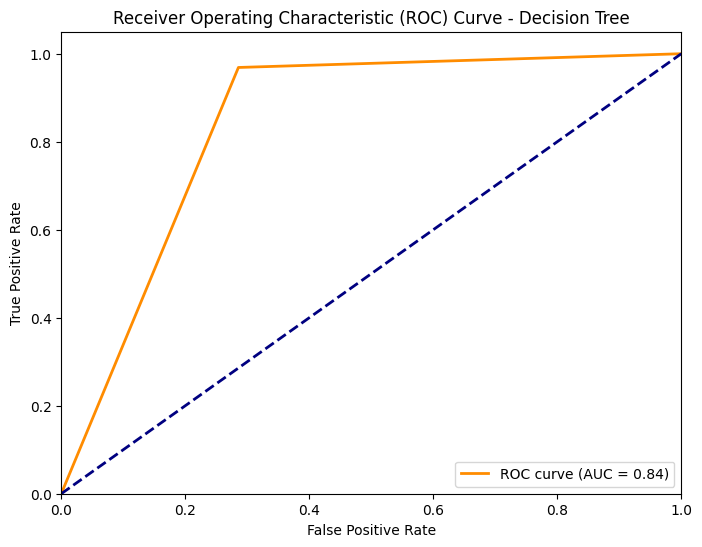

AUC Score: 0.84


In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

tree_model_predict = tree_model.predict(x_test)
tree_model_predict_proba = tree_model.predict_proba(x_test)[:, 1]  

accuracy_score_tree_model = accuracy_score(y_test, tree_model_predict)
conf_matrix_tree = confusion_matrix(y_test, tree_model_predict)
print("Confusion Matrix:")
print(conf_matrix_tree)

# Plot Confusion Matrix
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_tree, annot=True, cmap='Blues', fmt='g', cbar=False,
xticklabels=['Predicted Fail', 'Predicted Pass'],
yticklabels=['Actual Fail', 'Actual Pass'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Plot Decision Tree Decision Boundary
plt.subplot(1, 2, 2)
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=tree_model_predict_proba, cmap='coolwarm', edgecolors='k', marker='o', s=100)
plt.colorbar(label='Predicted Probability (Pass)')
plt.title('Decision Tree Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Print Accuracy
print("Decision Tree Model Accuracy: ", accuracy_score_tree_model)

# Draw ROC Curve
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, tree_model_predict_proba)
roc_auc_tree = roc_auc_score(y_test, tree_model_predict_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_tree))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

print("AUC Score: {:.2f}".format(roc_auc_tree))


K Nearest Neighbors

Confusion Matrix:
[[ 3  4]
 [ 3 29]]


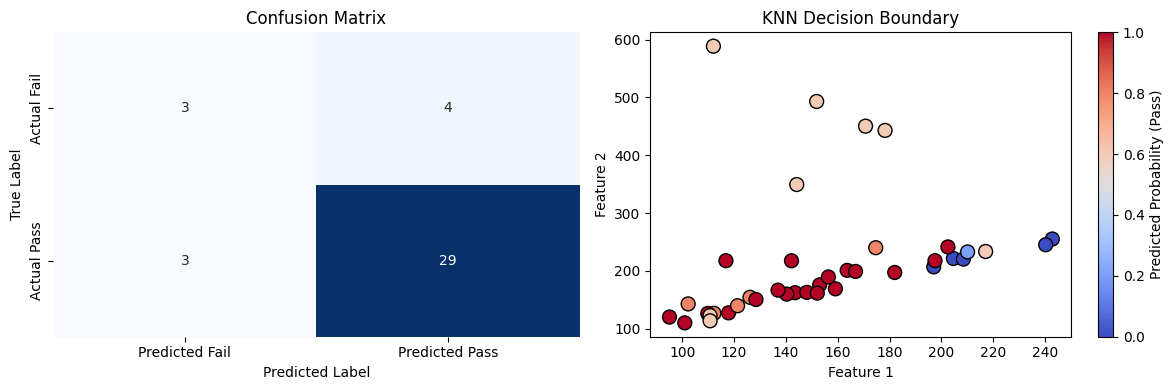

KNN Model Accuracy:  0.8205128205128205


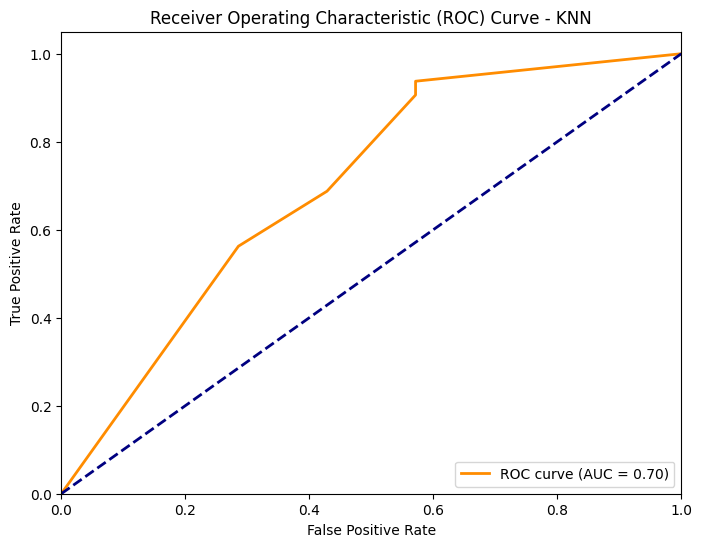

AUC Score: 0.70


In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

# Assuming x_train, y_train, x_test, y_test are your training and testing data
# Make sure to replace them with your actual data.

# KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

knn_model_predict = knn_model.predict(x_test)
knn_model_predict_proba = knn_model.predict_proba(x_test)[:, 1]

accuracy_score_knn_model = accuracy_score(y_test, knn_model_predict)
conf_matrix_knn = confusion_matrix(y_test, knn_model_predict)
print("Confusion Matrix:")
print(conf_matrix_knn)

# Plot Confusion Matrix
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='g', cbar=False,
xticklabels=['Predicted Fail', 'Predicted Pass'],
yticklabels=['Actual Fail', 'Actual Pass'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Plot KNN Decision Boundary
plt.subplot(1, 2, 2)
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=knn_model_predict_proba, cmap='coolwarm', edgecolors='k', marker='o', s=100)
plt.colorbar(label='Predicted Probability (Pass)')
plt.title('KNN Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Print Accuracy
print("KNN Model Accuracy: ", accuracy_score_knn_model)

# Draw ROC Curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_model_predict_proba)
roc_auc_knn = roc_auc_score(y_test, knn_model_predict_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc="lower right")
plt.show()

print("AUC Score: {:.2f}".format(roc_auc_knn))


Naive Bias

Confusion Matrix:
[[ 5  2]
 [10 22]]


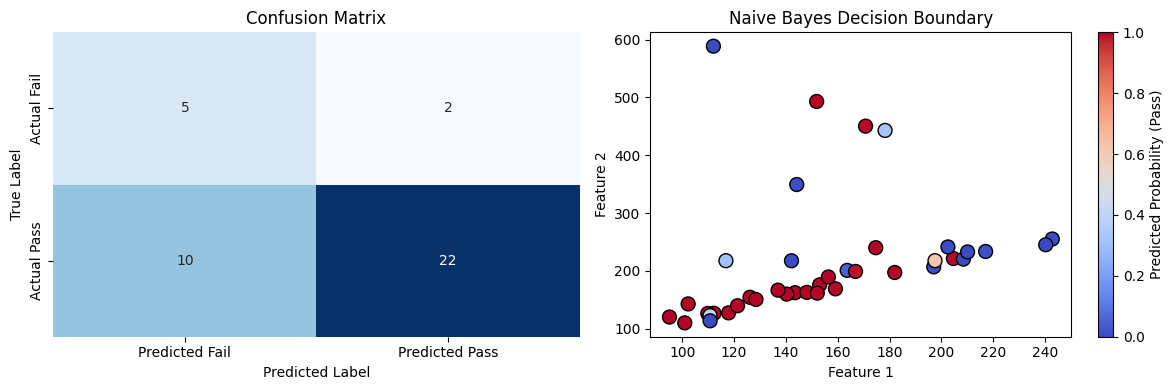

Naive Bayes Model Accuracy:  0.6923076923076923


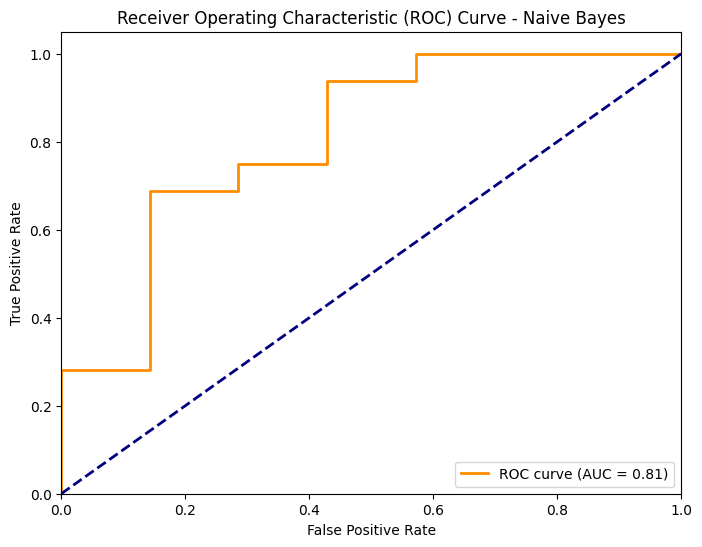

AUC Score: 0.81


In [94]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

# Assuming x_train, y_train, x_test, y_test are your training and testing data
# Make sure to replace them with your actual data.

# Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(x_train, y_train)

naive_bayes_model_predict = naive_bayes_model.predict(x_test)
naive_bayes_model_predict_proba = naive_bayes_model.predict_proba(x_test)[:, 1]

accuracy_score_naive_bayes_model = accuracy_score(y_test, naive_bayes_model_predict)
conf_matrix_naive_bayes = confusion_matrix(y_test, naive_bayes_model_predict)
print("Confusion Matrix:")
print(conf_matrix_naive_bayes)

# Plot Confusion Matrix
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_naive_bayes, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted Fail', 'Predicted Pass'],
            yticklabels=['Actual Fail', 'Actual Pass'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Plot Naive Bayes Decision Boundary
plt.subplot(1, 2, 2)
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=naive_bayes_model_predict_proba, cmap='coolwarm', edgecolors='k', marker='o', s=100)
plt.colorbar(label='Predicted Probability (Pass)')
plt.title('Naive Bayes Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Print Accuracy
print("Naive Bayes Model Accuracy: ", accuracy_score_naive_bayes_model)

# Draw ROC Curve
fpr_naive_bayes, tpr_naive_bayes, thresholds_naive_bayes = roc_curve(y_test, naive_bayes_model_predict_proba)
roc_auc_naive_bayes = roc_auc_score(y_test, naive_bayes_model_predict_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr_naive_bayes, tpr_naive_bayes, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_naive_bayes))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

print("AUC Score: {:.2f}".format(roc_auc_naive_bayes))
